In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

Our likelihood function is

$$p(y | X, \beta ,\sigma^2) \propto (\sigma^2)^{-n/2} \exp \left[-\frac{1}{2\sigma^2} (y-X\beta)^T (y-X\beta) \right] $$

Taking our priors as $\pi(\sigma^2) \propto \frac{1}{\sigma^2}$ and $\pi(\beta) \propto 1$ gives the posterior:

$$p(\sigma^2, \beta | x, y) \propto  (\sigma^2)^{-n/2 - 1} \exp \left[-\frac{1}{2\sigma^2} (y-X\beta)^T (y-X\beta) \right] $$

$$p(\beta |y, X ,\Sigma) \propto \exp \left[-\frac{1}{2\sigma^2} (y-X\beta)^T(y-X\beta) \right] $$

$$p(\sigma^2 | y, X, \beta) \propto (\sigma^2)^{-n/2 - 1} \exp \left[-\frac{1}{2\sigma^2} (y-X\beta)^T (y-X\beta) \right] $$

$$\sigma^2 | y, X, \beta \sim IG \left(\frac{n}{2}, \frac{(y-X\beta)^T (y-X\beta)}{2} \right)$$


In [3]:
df = pd.read_csv('student-mat.csv', sep=",")

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
X = df[['age', 'famrel', 'freetime', 'goout', 'G1', 'G2']].copy()
X['intercept'] = 1
y = df['G3']

In [6]:
from model_code import MH_regression

In [7]:
np.random.seed(seed=870)
betas, accept = MH_regression(X, y, 20, 3)
print(np.mean(accept))

0.0


## Choosing explanatory variables 

I think maybe at most 2 with missing values? And we can choose those 2 based on ease of picking priors. For example, any binary variable like sex would be relatively easy to use because we can use a bernoulli. Something like count data (like Failures) could be given a poisson? Or some sort of truncated distribution? 

In [8]:
df[["G1", "G2", "G3"]] = df[["G1", "G2", "G3"]].astype(int)

In [9]:
for col in df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64'].index:
    df[f'{col}_encoded'] = LabelEncoder().fit_transform(df[f'{col}'])    

In [10]:
cols = [col for col in df.columns if df[f"{col}"].dtype == int]

In [11]:
df[cols].corr()["G3"]

age                  -0.161579
Medu                  0.217147
Fedu                  0.152457
traveltime           -0.117142
studytime             0.097820
failures             -0.360415
famrel                0.051363
freetime              0.011307
goout                -0.132791
Dalc                 -0.054660
Walc                 -0.051939
health               -0.061335
absences              0.034247
G1                    0.801468
G2                    0.904868
G3                    1.000000
school_encoded       -0.045017
sex_encoded           0.103456
address_encoded       0.105756
famsize_encoded       0.081407
Pstatus_encoded      -0.058009
Mjob_encoded          0.102082
Fjob_encoded          0.042286
reason_encoded        0.121994
guardian_encoded     -0.070109
schoolsup_encoded    -0.082788
famsup_encoded       -0.039157
paid_encoded          0.101996
activities_encoded    0.016100
nursery_encoded       0.051568
higher_encoded        0.182465
internet_encoded      0.098483
romantic

And we're all ok with assuming that our response is normally distributed? It's not too clear to me but am ok if you guys are. See below. We can always transform like what we did for Exam 1 in the count of casual/registered bike users.

<AxesSubplot:>

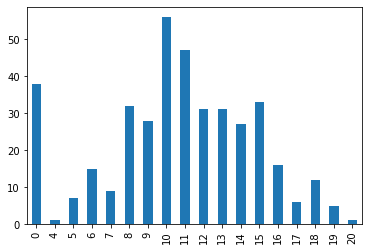

In [12]:
df["G3"].value_counts().sort_index().plot.bar()